In [8]:
from sklearn.datasets import make_regression
reg_data, reg_target = make_regression(n_samples=2000,n_features=3,effective_rank=2, noise=10)

In [9]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
import numpy as np
n_bootstraps = 1000
len_data = len(reg_data)
subsample_size = np.int(0.5*len_data)
subsample = lambda: np.random.choice(np.arange(0,
len_data),size=subsample_size)
coefs = np.ones((n_bootstraps, 3))

In [10]:
for i in range(n_bootstraps):
      subsample_idx = subsample()
      subsample_X = reg_data[subsample_idx]
      subsample_y = reg_target[subsample_idx]
      lr.fit(subsample_X, subsample_y)
      coefs[i][0] = lr.coef_[0]
      coefs[i][1] = lr.coef_[1]
      coefs[i][2] = lr.coef_[2]

In [4]:
from sklearn.linear_model import Ridge
r = Ridge()
n_bootstraps = 1000
len_data = len(reg_data)
subsample_size = np.int(0.5*len_data)
subsample = lambda: np.random.choice(np.arange(0,len_data),size=subsample_size)
coefs_r = np.ones((n_bootstraps, 3))
for i in range(n_bootstraps):
  subsample_idx = subsample()
  subsample_X = reg_data[subsample_idx]
  subsample_y = reg_target[subsample_idx]

In [5]:
r.fit(subsample_X, subsample_y)
coefs_r[i][0] = r.coef_[0]
coefs_r[i][1] = r.coef_[1]
coefs_r[i][2] = r.coef_[2]

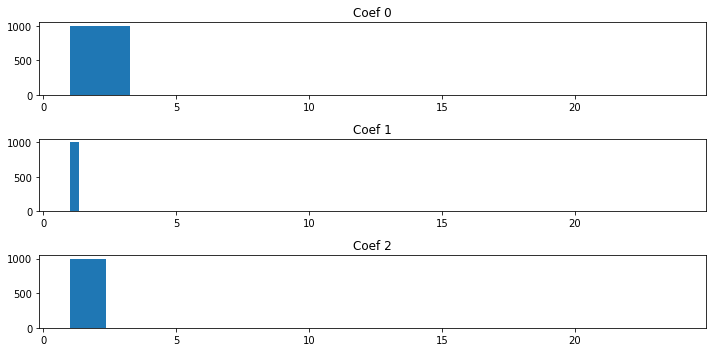

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
ax1 = plt.subplot(311, title ='Coef 0')
ax1.hist(coefs_r[:,0])
ax2 = plt.subplot(312,sharex=ax1, title ='Coef 1')
ax2.hist(coefs_r[:,1])
ax3 = plt.subplot(313,sharex=ax1, title ='Coef 2')
ax3.hist(coefs_r[:,2])
plt.tight_layout()

In [7]:
np.var(coefs, axis=0)

array([235.15072933, 258.4406961 , 459.79797369])

In [11]:
np.var(coefs_r, axis=0)

array([0.51870593, 0.01223243, 0.18899636])